# Linear Regression Modeling
This notebook reads in the processed movie data and fits it to a linear regression model. Regularization with Ridge is used to improve model test accuracy and feature coefficient importances are retrieved.

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn import pipeline, feature_selection, model_selection, linear_model, preprocessing
%matplotlib inline
%pylab inline

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


In [3]:
# read in combined Boxofficemojo and the-Numbers data
df = pd.read_csv('data/data_2.csv')

In [4]:
df.head()

,title,intl_gross,dom_gross,budget,runtime,num_theaters,num_days,director,genre,mpaa_rating,release_month,release_year,release_date,total_gross
0,T2: Trainspotting,4.168175e+07,2.402004e+06,18000000.0,117.0,331.000000,70.0,Danny Boyle,Crime Comedy,R,Mar,2017,2017-03-17,4.294491e+07
1,Resident Evil: The Final Chapter,3.122426e+08,2.683007e+07,40000000.0,106.0,114.231318,63.0,Paul W.S. Anderson,Sci-Fi Action,R,Jan,2017,2017-01-27,3.213915e+08
2,Baby Driver,2.269451e+08,1.078259e+08,34000000.0,112.0,114.231318,114.0,Edgar Wright,Action / Crime,R,Jun,2017,2017-06-28,2.437223e+08
3,Hacksaw Ridge,1.790369e+08,6.864142e+07,40000000.0,131.0,114.231318,126.0,Mel Gibson,Action Drama,R,Nov,2016,2016-11-04,2.073342e+08
4,Patriots Day,5.162680e+07,3.256565e+07,45000000.0,130.0,114.231318,79.0,Peter Berg,Drama,R,Dec,2016,2016-12-21,6.047380e+07


## EDA

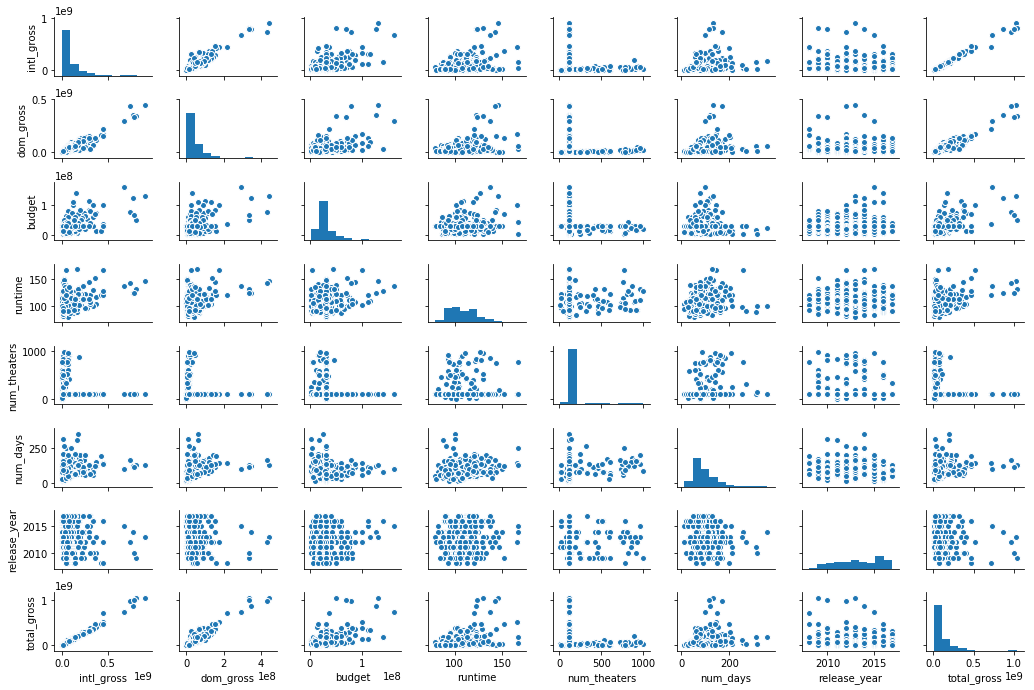

In [5]:
sns.pairplot(df, size = 1.2, aspect=1.5);

In [6]:
# convert release_year to string to force categorical treatment of feature
df['year_str'] = df['release_year'].apply(lambda x: str(x))

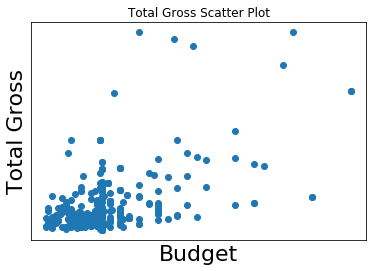

In [7]:
# plot 
plt.scatter(df['budget'], df['total_gross']);
plt.xlabel('Budget', fontsize=22)
plt.ylabel('Total Gross', fontsize=22)
plt.xticks([])
plt.yticks([])
plt.title('Total Gross Scatter Plot')
savefig('budget_scat.png')

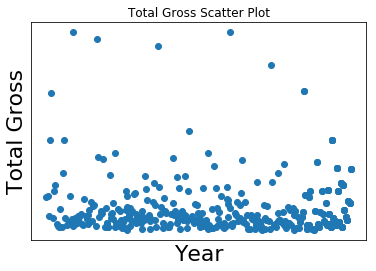

In [8]:
plt.scatter(df['release_date'], df['total_gross']);
plt.xlabel('Year', fontsize=22)
plt.ylabel('Total Gross', fontsize=22)
plt.xticks([])
plt.yticks([])
plt.title('Total Gross Scatter Plot')
savefig('release_scat.png')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 15 columns):
title            396 non-null object
intl_gross       396 non-null float64
dom_gross        396 non-null float64
budget           396 non-null float64
runtime          396 non-null float64
num_theaters     396 non-null float64
num_days         396 non-null float64
director         396 non-null object
genre            396 non-null object
mpaa_rating      396 non-null object
release_month    396 non-null object
release_year     396 non-null int64
release_date     396 non-null object
total_gross      396 non-null float64
year_str         396 non-null object
dtypes: float64(7), int64(1), object(7)
memory usage: 46.5+ KB


In [10]:
df.corr()

,intl_gross,dom_gross,budget,runtime,num_theaters,num_days,release_year,total_gross
intl_gross,1.000000,0.921871,0.523917,0.338963,-0.184756,0.238648,0.032638,0.992527
dom_gross,0.921871,1.000000,0.468339,0.311009,-0.192828,0.274418,-0.033288,0.937202
budget,0.523917,0.468339,1.000000,0.208404,-0.106669,-0.037464,0.039595,0.514457
runtime,0.338963,0.311009,0.208404,1.000000,0.021201,0.189582,0.128515,0.338319
num_theaters,-0.184756,-0.192828,-0.106669,0.021201,1.000000,0.280677,-0.082823,-0.182776
num_days,0.238648,0.274418,-0.037464,0.189582,0.280677,1.000000,-0.121533,0.239738
release_year,0.032638,-0.033288,0.039595,0.128515,-0.082823,-0.121533,1.000000,-0.018926
total_gross,0.992527,0.937202,0.514457,0.338319,-0.182776,0.239738,-0.018926,1.000000


## Model

Linear regression modeling with scikit

In [11]:
# set up matrices

y, X = patsy.dmatrices('total_gross ~ budget + runtime + num_theaters + num_days + genre\
+ mpaa_rating + release_month + year_str', data=df, return_type="dataframe")


In [14]:
# normalize scaling
X_norm = preprocessing.normalize(X.values, axis=0)
y_norm = preprocessing.normalize(y.values, axis=0)

In [15]:
from sklearn.model_selection import train_test_split
# test/train split with normalized y

xtrain_n, xtest_n, ytrain_n, ytest_n = train_test_split(X_norm, y_norm)

In [16]:
from sklearn import preprocessing, linear_model, pipeline
# create model with sklearn with normalized y

model= linear_model.LinearRegression(fit_intercept=False)
model.fit(xtrain_n, ytrain_n)
model.score(xtrain_n, ytrain_n)

0.6272984818196863

In [17]:
model.score(xtest_n, ytest_n)

-4.7319360943386084e+26

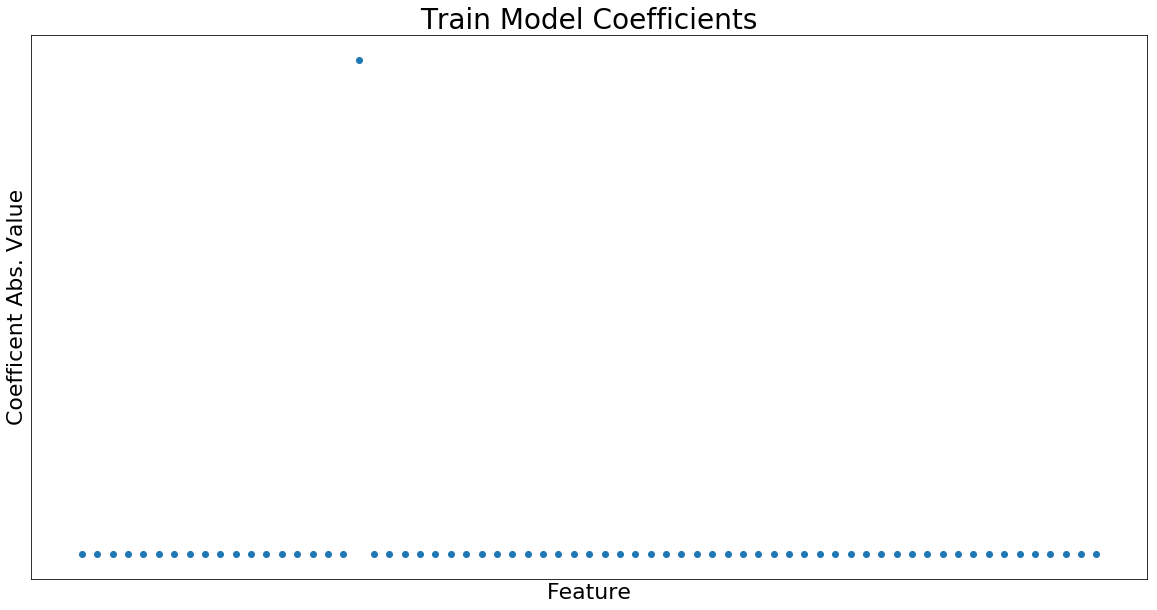

In [18]:
figsize(20, 10)

scatter(np.arange(len(X.columns)), np.abs(model.coef_))
plt.xticks(np.arange(len(model.coef_)), X.columns, rotation=90);
plt.title('Train Model Coefficients', fontsize=28)
plt.ylabel('Coefficent Abs. Value', fontsize=22)
plt.xlabel('Feature', fontsize=22)
plt.xticks([])
plt.yticks([])
plt.tick_params(labelsize=17)
savefig('coeffs1.png')

In [19]:
# inspect 12th feature
X.columns[11]

'genre[T.Concert]'

## Regularization

r^2 train >> r^2 test so model looks to be overfit. Try regularization to get a better r^2 test.

In [20]:
# regularize with ridge

ridge_pipe = pipeline.Pipeline([
     ("imp", preprocessing.Imputer()), 
     ("std", preprocessing.MinMaxScaler()),
     ("var", feature_selection.VarianceThreshold()), 
     ("ridge", linear_model.Ridge())
    ])

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


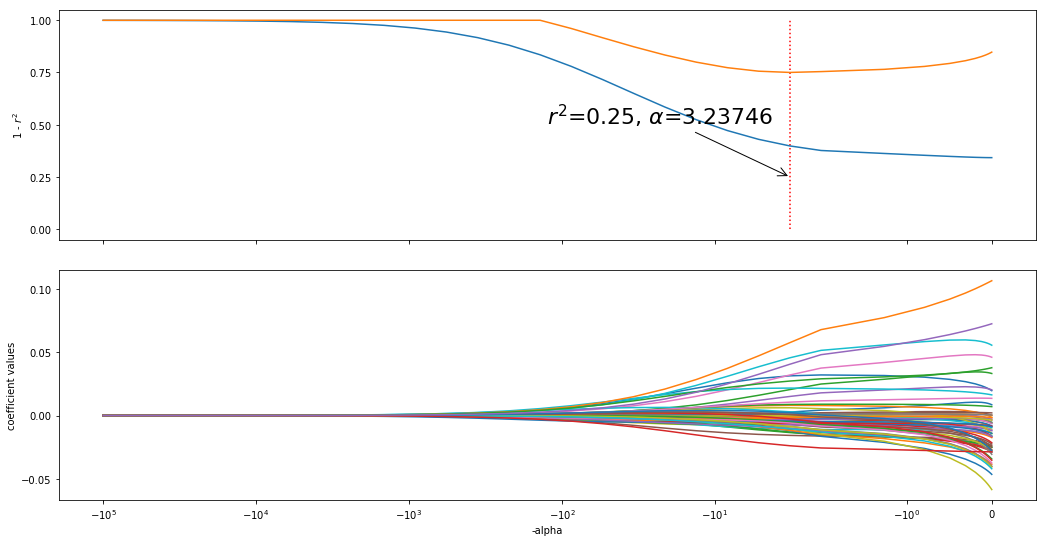

In [21]:
fig, axes = plt.subplots(2,1, figsize=(15, 8), sharex=True, tight_layout=True)

# alphas look best when logspaced
alphas = np.logspace(-5, 5, num=50)
coefs = []
train_scores = []
test_scores = []

# loop through each of the 50 alphas
for i, alpha in enumerate(alphas):
    # set the alpha for our pipeline
    ridge_pipe.set_params(ridge__alpha=alpha)
    # cross validate and store the results
    cv_result = model_selection.cross_validate(
        ridge_pipe, X=X, y=y, cv=10, return_train_score=True)
    # use np.maximum(., 0) to make sure the scores don't go below zero (makes for ugly plots tbh)
    train_scores.append(np.maximum(np.mean(cv_result['train_score']), 0))
    test_scores.append(np.maximum(np.mean(cv_result['test_score']), 0))
    
    # fit again to grab coefficients
    ridge_pipe.fit(xtrain_n, ytrain_n)
    coefs.append(ridge_pipe.named_steps["ridge"].coef_)

matplotlib.rcParams.update({'font.size': 22})
coefs = np.squeeze(coefs, axis=1)
ax0 = axes.flat[0]
ax0.plot(-alphas, 1 - np.array(train_scores), label="train")
ax0.plot(-alphas, 1 - np.maximum(test_scores, 0), label="test")
best_i = np.argmax(test_scores)
ax0.vlines(-alphas[best_i], 0,1, colors="red", linestyles="dotted")
ax0.set_ylabel("1 - $r^2$")
ann_xy = (-alphas[best_i], test_scores[best_i])
ann_text = f"$r^2$={test_scores[best_i]:.2}, $\\alpha$={alphas[best_i]:g}"
ax0.annotate(ann_text, xy=ann_xy, xytext=(.5,.5), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->"),
            )
ax1 = axes.flat[1]
ax1.plot(-alphas,coefs)
ax1.set_ylabel("coefficient values")
ax1.set_xlabel("-alpha")
ax1.set_xscale("symlog")
plt.xscale("symlog")
savefig('lrn_curve.png')


In [22]:
coeff_index = X.columns[ridge_pipe.named_steps["var"].get_support()]

In [23]:
alpha_input = alphas[best_i]

In [24]:
var_support = ridge_pipe.named_steps["var"].get_support()
feat = X.columns[var_support]
coef = ridge_pipe.named_steps["ridge"].coef_
sort_i = argsort(-np.abs(coef))

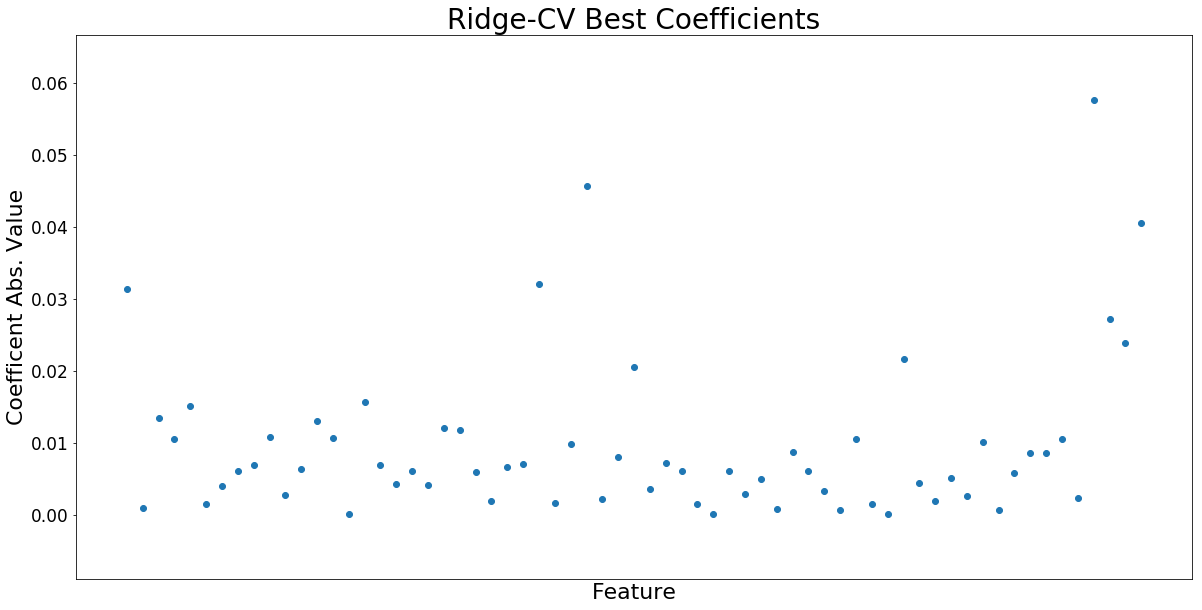

In [25]:
matplotlib.rcParams.update({'font.size': 10})

best_c = coefs[best_i,:]

scatter(np.arange(len(best_c)), abs(best_c))
plt.xticks(np.arange(len(best_c)), coeff_index, rotation=90);
plt.title('Ridge-CV Best Coefficients', fontsize=28)
plt.ylabel('Coefficent Abs. Value', fontsize=22)
plt.xlabel('Feature', fontsize=22)
plt.xticks([])
plt.tick_params(labelsize=17)
savefig('coeffs2.png')

In [38]:
y_predict = fit2.predict(X)
residuals = y - y_predict

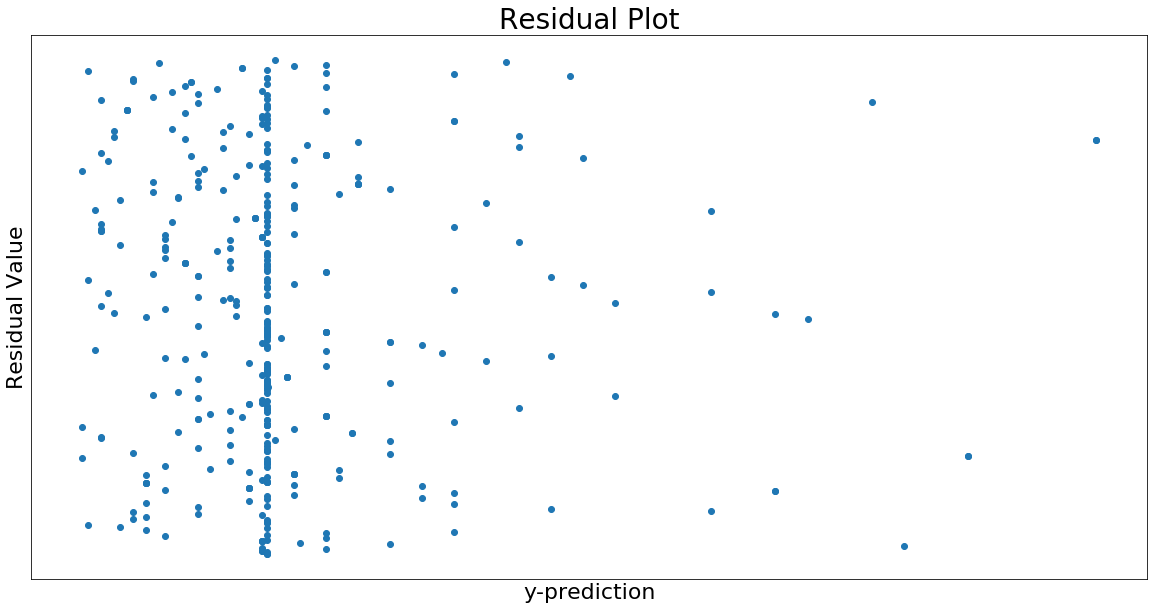

In [45]:
plt.scatter(y_predict, residuals);
plt.title('Residual Plot', fontsize=28)
plt.xlabel('y-prediction', fontsize=22)
plt.ylabel('Residual Value', fontsize=22)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
savefig('resid2.png')